# CRIME DATA K-Means

Lets import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('crime_data (1).csv')
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


Lets Explore our dataset

In [3]:
df = data.copy()

In [4]:
df.shape

(50, 5)

<AxesSubplot:>

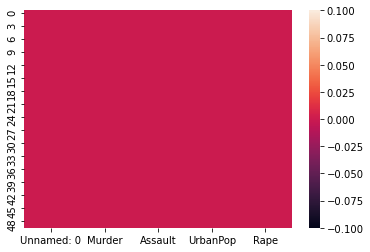

In [6]:
sns.heatmap(df.isnull(), annot=False) # No Blank values in the report

In [7]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [8]:
df.columns

Index(['Unnamed: 0', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

<AxesSubplot:title={'center':'KDE Plot of CRIM DATA'}, ylabel='Density'>

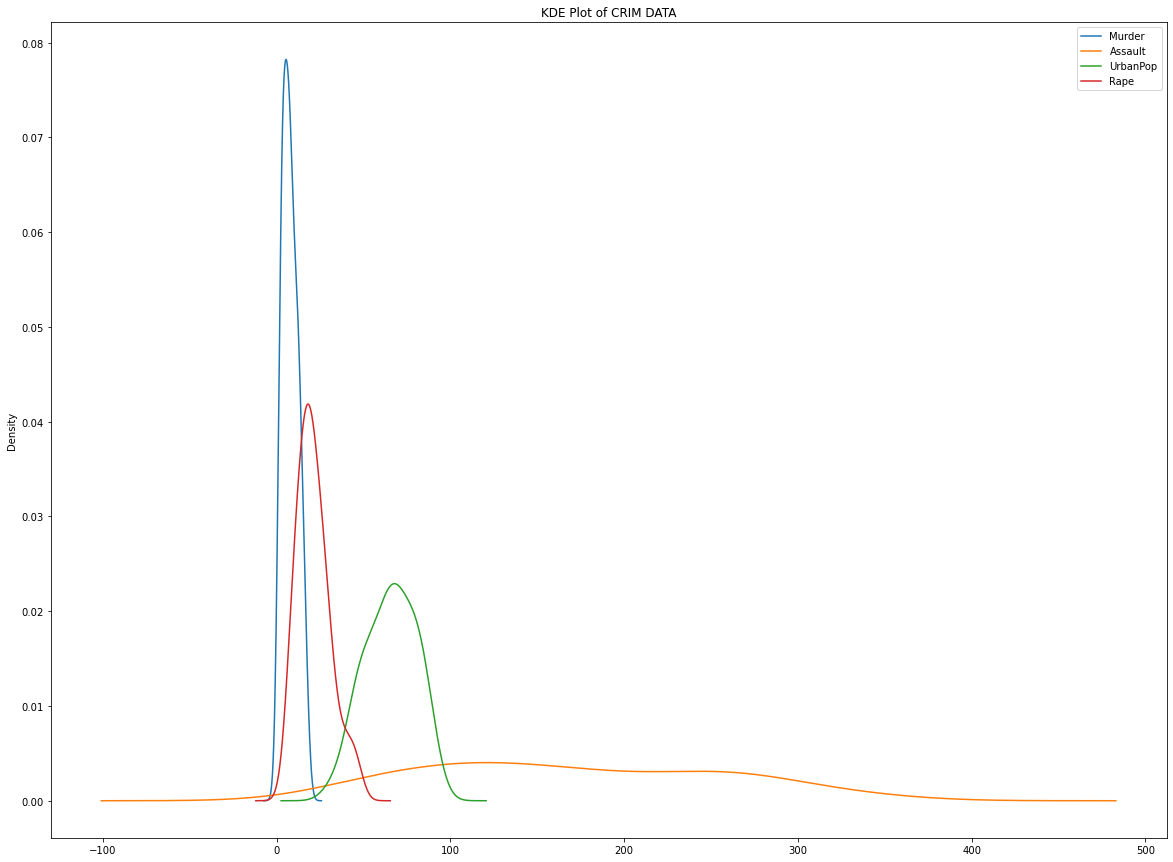

In [10]:
plt.rcParams['figure.figsize'] = (20,15)
df[['Murder', 'Assault', 'UrbanPop', 'Rape']].plot(kind='kde', title='KDE Plot of CRIM DATA')

<AxesSubplot:title={'center':'BOX Plot of CRIM DATA'}>

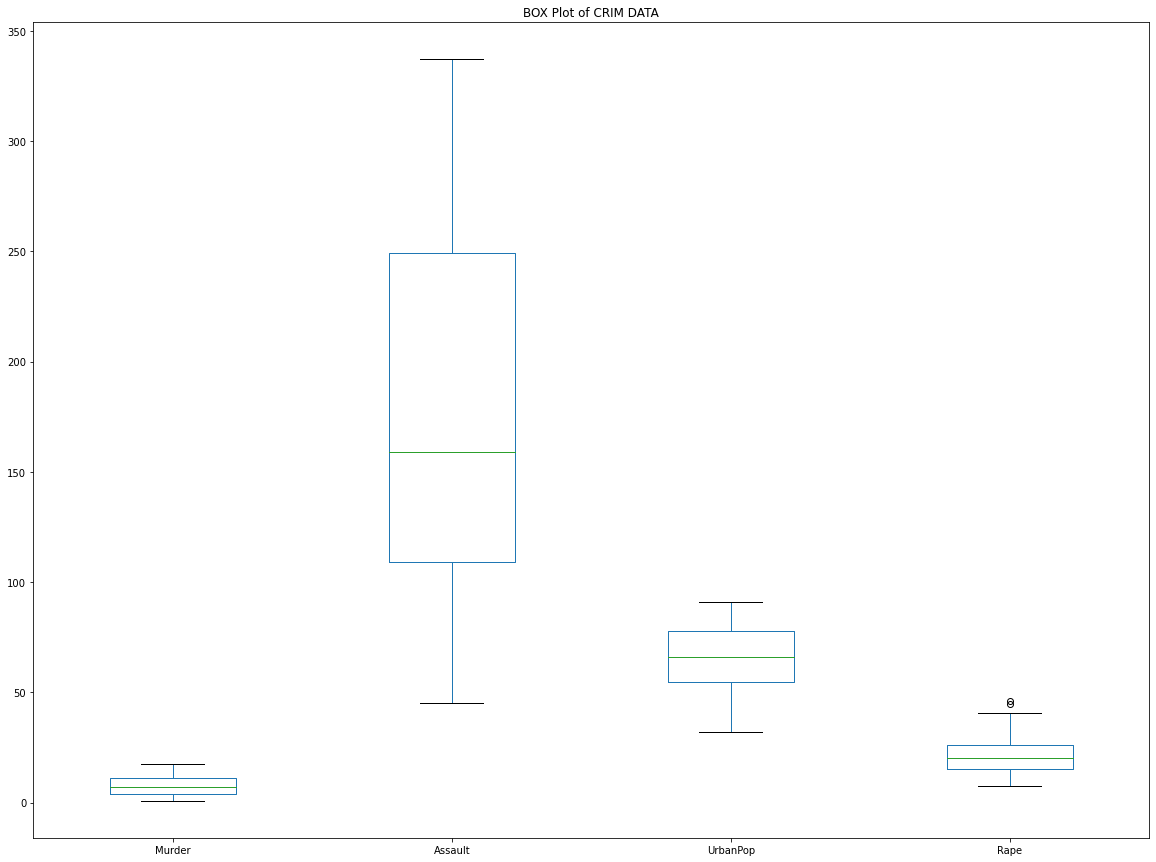

In [11]:
plt.rcParams['figure.figsize'] = (20,15)
df[['Murder', 'Assault', 'UrbanPop', 'Rape']].plot(kind='box', title='BOX Plot of CRIM DATA')

Looks like there are some outliers in RAPE COLUMN

Lets check how many values are outliers

In [13]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR = Q3 - Q1

outliers = (df < (Q1-1.5*IQR))| (df > (Q3 + 1.5 * IQR))
outliers.sum()

<ipython-input-13-5462b9f61cb2>:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = (df < (Q1-1.5*IQR))| (df > (Q3 + 1.5 * IQR))
<ipython-input-13-5462b9f61cb2>:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = (df < (Q1-1.5*IQR))| (df > (Q3 + 1.5 * IQR))


Assault       0
Murder        0
Rape          2
Unnamed: 0    0
UrbanPop      0
dtype: int64

There are 2 values which are outlier

Lets look at Correlation of our data

<AxesSubplot:>

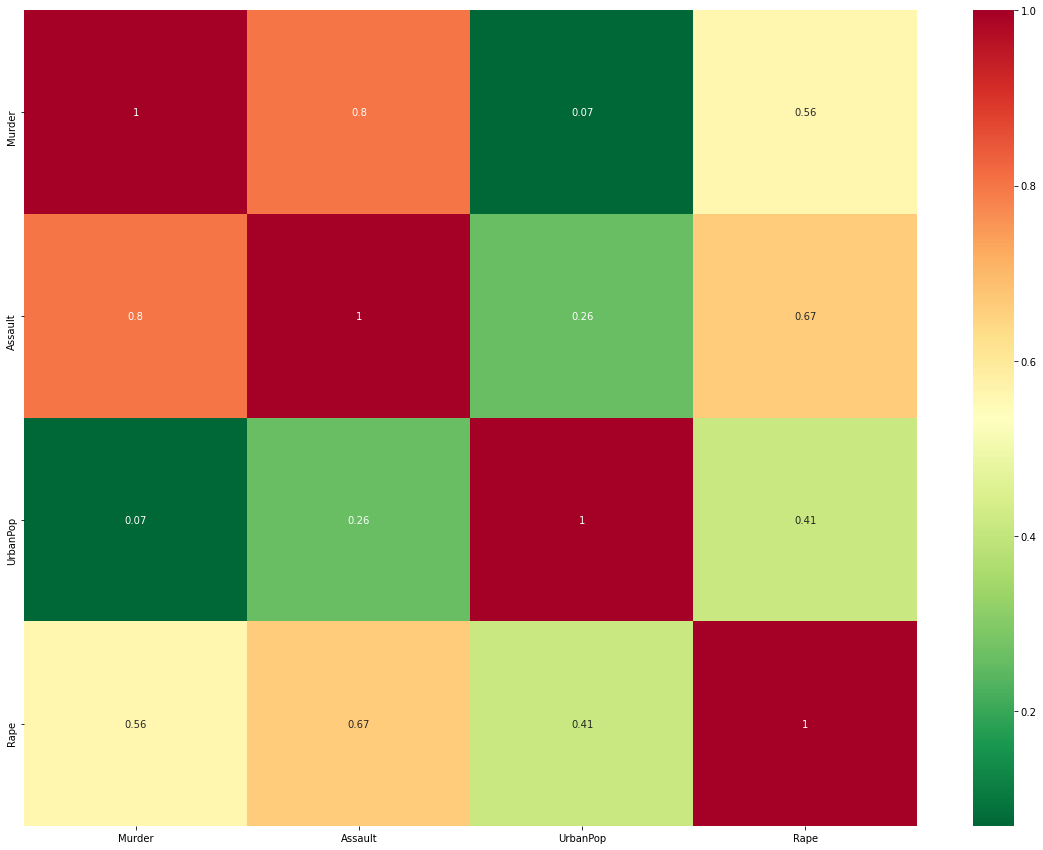

In [15]:
df = df.drop(columns="Unnamed: 0")
sns.heatmap(df.corr(), annot=True,cmap='RdYlGn_r')

Lets Normalize our data

In [16]:
def norm_func(i):
    x= (i-i.min())/(i.max()-i.min())
    return(x)
norm = df.copy()
data_norm = norm_func(norm)
data_norm.describe()

,Murder,Assault,UrbanPop,Rape
count,50.000000,50.000000,50.000000,50.000000
mean,0.420964,0.430685,0.568475,0.360000
std,0.262380,0.285403,0.245335,0.242025
min,0.000000,0.000000,0.000000,0.000000
25%,0.197289,0.219178,0.381356,0.200904
50%,0.388554,0.390411,0.576271,0.330749
75%,0.629518,0.698630,0.775424,0.487726
max,1.000000,1.000000,1.000000,1.000000


Lets Create an Elboe or Skree Plot

Text(0, 0.5, 'total_within_SS')

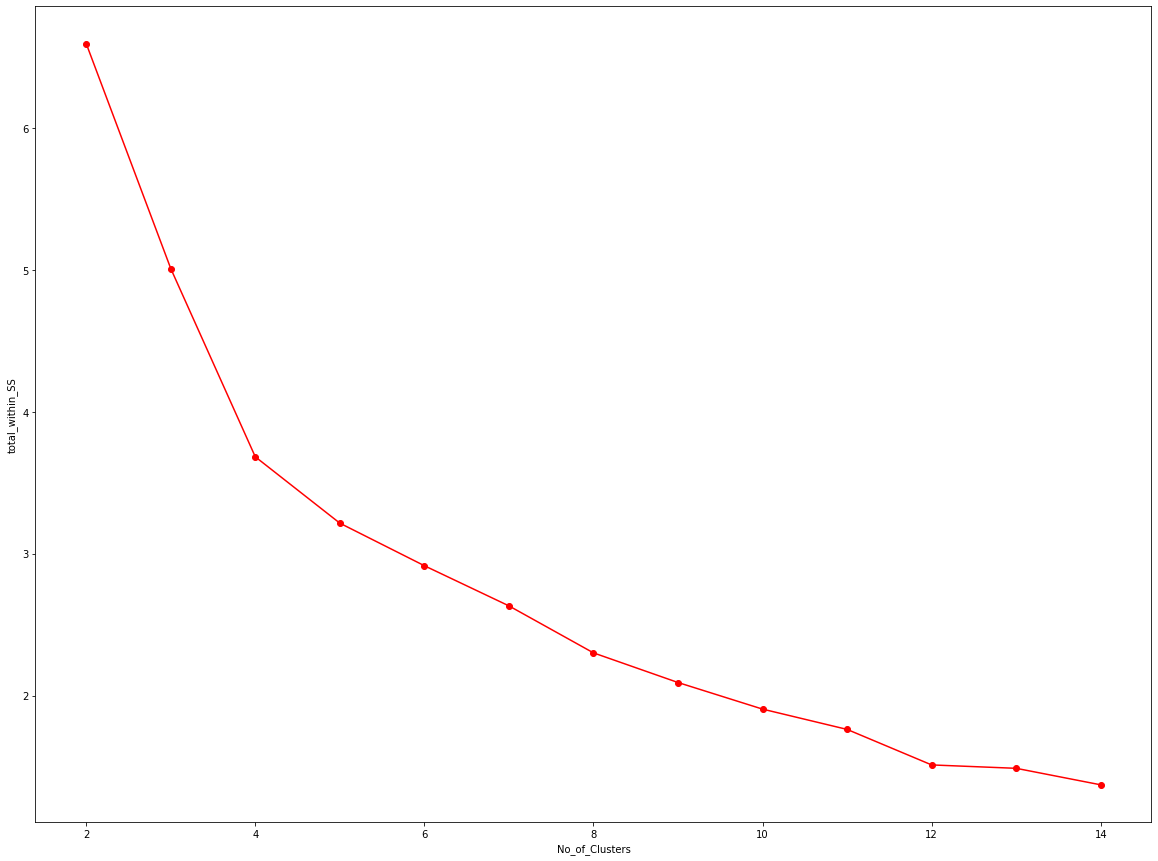

In [17]:
TWSS = []
k=list(range(2,15))

for i in k:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data_norm)
    TWSS.append(kmeans.inertia_)
    
plt.plot(k,TWSS, 'ro-');plt.xlabel('No_of_Clusters');plt.ylabel('total_within_SS')

Lets reverify it with KneeLocatoer

In [18]:
from kneed import KneeLocator

In [19]:
kl = KneeLocator(range(2,15), TWSS, curve='convex', direction='decreasing')
kl.elbow

5

Lets see if are able to identify it better with 4 or 5 clusters

In [24]:
df1 = df.copy()
model = KMeans(n_clusters=5,)
model.fit(data_norm)
model.labels_
md = pd.Series(model.labels_)
df1['Clust'] = md
df1.head()

,Murder,Assault,UrbanPop,Rape,Clust
0,13.2,236,58,21.2,1
1,10.0,263,48,44.5,2
2,8.1,294,80,31.0,2
3,8.8,190,50,19.5,3
4,9.0,276,91,40.6,2


In [25]:
df2 = df.copy()
model = KMeans(n_clusters=4,)
model.fit(data_norm)
model.labels_
md = pd.Series(model.labels_)
df2['Clust'] = md
df2.head()

,Murder,Assault,UrbanPop,Rape,Clust
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,3
2,8.1,294,80,31.0,3
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,3


In [27]:
cluster1 = df1.iloc[:, :-1].groupby(df1.Clust).mean()
cluster1

,Murder,Assault,UrbanPop,Rape
Clust,,,,
0,4.500000,126.333333,83.500000,16.266667
1,14.671429,251.285714,54.285714,21.685714
2,10.966667,264.000000,76.500000,33.608333
3,6.753333,143.466667,64.533333,19.986667
4,2.680000,70.100000,51.000000,10.910000


In [28]:
cluster2 = df2.iloc[:, :-1].groupby(df2.Clust).mean()
cluster2

,Murder,Assault,UrbanPop,Rape
Clust,,,,
0,13.937500,243.625000,53.750000,21.412500
1,3.600000,78.538462,52.076923,12.176923
2,5.852941,141.176471,73.647059,19.335294
3,10.966667,264.000000,76.500000,33.608333


In [29]:
cluster1.to_csv("KMEANS_CRIMEDATA_5CLUSTERS.csv", encoding='utf-8')
cluster2.to_csv("KMEANS_CRIMEDATA_4CLUSTERS.csv", encoding='utf-8')